# Dealing with missing data

## 예제 데이터 셋 

In [90]:
import pandas as pd
from io import StringIO
import numpy as np
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)

"""
df2 = pd.DataFrame([[1.0,2.0,3.0,4.0],[5.0,6.0,,8.0],[10.0,11.0,12.0]])
% 직접 이렇게 생성시에는 오류가 남
"""

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


'\ndf2 = pd.DataFrame([[1.0,2.0,3.0,4.0],[5.0,6.0,,8.0],[10.0,11.0,12.0]])\n% 직접 이렇게 생성시에는 오류가 남\n'

## isnull 메서드

In [91]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [92]:
#'values' 어트리뷰트를 통해 numpy array를 불러올 수 있다.
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## dropna 메서드

In [93]:
# missing value 포함하는 행 제거
# 유지하고 싶으면 다른 변수에 저장 해야함

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [94]:
# missing value 포함하는 열 제거

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [95]:
# 모든 값이 nan인 행만 제거

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [96]:
# 4개 이상의 true value를 가진 행만 남김

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


## Imputing missing values 

In [97]:
# 열 평균값으로 missing value 외삽

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [98]:
# Test for categorical column
df2 = df.copy()
df2['E'] = ['blue','green',np.NaN]
print(df)
df2.isnull()

# string으로 된 category는 imputer가 처리할 수가 없음
#imr = imr.fit(df2.values)
#imputed_data = imr.transform(df2.values)
#imputed_data

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


,A,B,C,D,E
0,False,False,False,False,False
1,False,False,True,False,False
2,False,False,False,True,True


# Handling Categorical Data

## 예제 데이터 셋

In [99]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## maping ordinal features

In [100]:
# dictionary type
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## Encoding class labels 

In [101]:
import numpy as np

# mapping 딕셔너리 생성

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

mapping하지 말고 LabelEncoder를 써도 됨

In [102]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

## Performing one-hot encoding on nominal features 

In [103]:
X = df[['color', 'size', 'price']].values
print(X)
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

# LabelEncoder는 0,1,2로 인코딩을 해줘서 order가 생기니까 아래의 OneHotEncoder를 사용해줌

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [104]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0]) # 몇 번째 feature가 categorical feature인지. 0번째 열이 카테고리니까 0을 넣어줌
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

## pandas를 이용한 one-hot 인코딩 (get_dummies 함수)

In [105]:
pd.get_dummies(df[['price', 'color', 'size']]) # 수치 데이터가 아닌 것을 자동으로 잡아줌
# pandas는 알아서 string이면 categorical feature로 인식함

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


### multicollinearity 완화

In [106]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


# Partitioning a dataset into training and test sets

## Wine dataset 

In [107]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## train_test_split

In [109]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

# Bringing features onto the same scale 
Train/Test Set을 고르기 전에 일괄적으로 Scaling을 하는 것은 Train set의 정보를 이용하여 Test set을 scale하는 것이므로 train/test set을 나누는 의미가 사라짐. 그래서 X_train은 X_train 끼리만 scale을 해주고, X_test는 X_test끼리만 scale을 해줘야 함

In [110]:
from sklearn.preprocessing import MinMaxScaler
# 변환 후 최솟값 최댓값??
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]])

In [111]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Selecting meaningful features

## L1 Regularization 

In [112]:
from sklearn.linear_model import LogisticRegression

# 여기서 C는 1/Lambda 임
lr = LogisticRegression(penalty='l1', C=1.0)  # L1 regularizatoin
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [113]:
lr.intercept_

array([-1.26364417, -1.21583725, -2.3700814 ])

In [114]:
lr.coef_  # 계수 반환 (제거된 feature 확인)

array([[ 1.24628203,  0.17999014,  0.74641248, -1.16369175,  0.        ,
         0.        ,  1.15884913,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55740655,  2.50894688],
       [-1.53788708, -0.38663187, -0.99542864,  0.36450209, -0.05927756,
         0.        ,  0.66773903,  0.        ,  0.        , -1.9331743 ,
         1.2353479 ,  0.        , -2.23240454],
       [ 0.13566038,  0.16857795,  0.35725608,  0.        ,  0.        ,
         0.        , -2.43777477,  0.        ,  0.        ,  1.56377526,
        -0.81845395, -0.49260361,  0.        ]])

## regularization 강도에 따른 weight값 변화

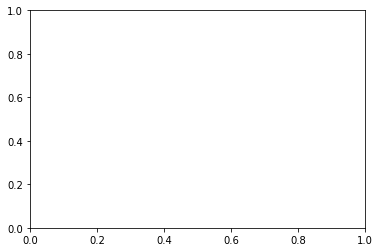

In [115]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

## plot 색 지정
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

### 학습되는 weights와 regularization parameter

In [116]:
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

### drawing plot

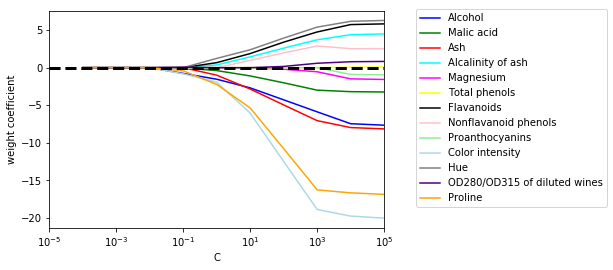

In [135]:
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
#plt.legend(loc='upper left')
plt.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show()

## L2 Regularization (과제 1)

In [118]:
from sklearn.linear_model import LogisticRegression

# 여기서 C는 1/Lambda 임
lr = LogisticRegression(penalty='l2', C=1.0)  # L2 regularizatoin
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


In [119]:
lr.intercept_

array([-1.33509136, -0.96973542, -2.04898785])

In [120]:
lr.coef_  # 계수 반환 (제거된 feature 확인)

array([[ 1.27713853,  0.38210274,  0.8015599 , -1.30842842,  0.22782837,
         0.23101419,  0.90234371, -0.08423823,  0.01462196, -0.0312838 ,
         0.02796323,  0.71703048,  1.79262118],
       [-1.45395571, -0.620303  , -1.05445248,  0.67148394, -0.29048951,
         0.18277571,  0.51163918,  0.10789643,  0.08199321, -1.61228834,
         0.88800662,  0.1659356 , -1.73246957],
       [ 0.38965148,  0.4083047 ,  0.40211468,  0.26242969,  0.15288658,
        -0.20064653, -1.38792256, -0.06305419, -0.28440345,  1.2553389 ,
        -0.93849662, -0.83821807,  0.13754706]])

## regularization 강도에 따른 weight값 변화

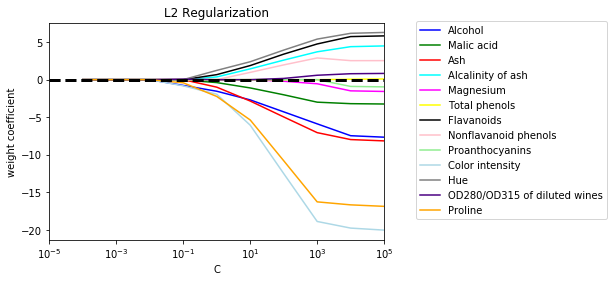

In [132]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

## plot 색 지정
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights2, params2 = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights2.append(lr.coef_[1])
    params2.append(10**c)

weights2 = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params2, weights2[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
plt.title("L2 Regularization")
plt.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## 특성 자동 선택 

### 일변량 통계 

In [122]:
from sklearn.feature_selection import SelectPercentile, SelectKBest

# 원래 데이터에 noise features 추가함
rng = np.random.RandomState(42)

noise_train = rng.normal(size=(len(X_train_std), 15)) # random data 생성 15개 특성
noise_test = rng.normal(size=(len(X_test_std), 15))   
X_train_noise = np.hstack([X_train_std, noise_train]) # 원래 변수들에 추가함
X_test_noise = np.hstack([X_test_std, noise_test]) 

X_train_noise.shape: (124, 28)
X_train_selected.shape: (124, 14)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False  True False False False False False
 False False False False]


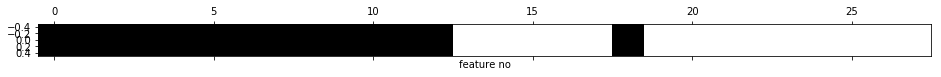

노이즈가 잘 제거됨을 확인할 수 있다!


In [123]:
## 분류 문제일 경우에 변수 선택
select = SelectPercentile(percentile=50)  # 50%의 feature만 남긴다.
select.fit(X_train_noise, y_train)
X_train_selected = select.transform(X_train_noise)

print("X_train_noise.shape: {}".format(X_train_noise.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

mask = select.get_support()
print(mask) # 선택된 특성
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature no")
plt.show()

print("노이즈가 잘 제거됨을 확인할 수 있다!")

# 주로 random 하게 생성된 노이즈 변수들이 제거됨

In [124]:
X_test_selected = select.transform(X_test_noise)

lr = LogisticRegression()
lr.fit(X_train_noise, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_noise, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.981
선택된 일부 특성을 사용한 점수: 1.000


# 과제 2

In [125]:
from sklearn.feature_selection import SelectPercentile, SelectKBest

# 원래 데이터에 noise features 추가함
rng = np.random.RandomState(42)

noise_train = rng.normal(size=(len(X_train_std), 15)) # random data 생성 15개 특성
noise_test = rng.normal(size=(len(X_test_std), 15))   
X_train_noise = np.hstack([X_train_std, noise_train]) # 원래 변수들에 추가함
X_test_noise = np.hstack([X_test_std, noise_test]) 

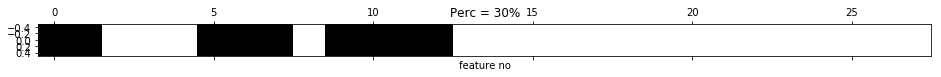

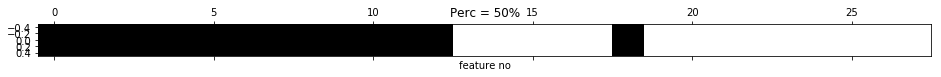

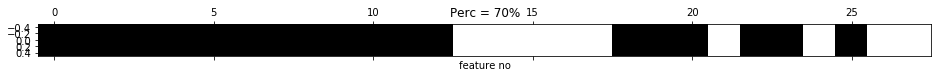

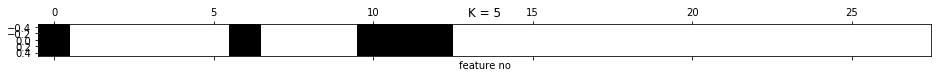

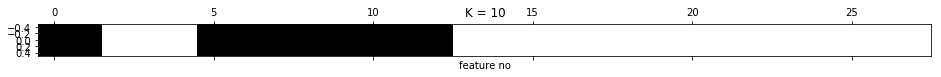

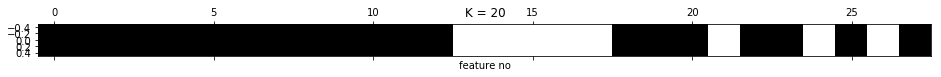

In [126]:
# 그림 그리고
# 점수를 출력하면 된다.

grid = {}
grid['percentile'] = [30, 50, 70]
grid['best'] = [5, 10, 20]

# 스코어 저장용 딕셔너리
selected_score = {}

# noise_score는 어떻게 변수를 선별하냐에 관계 없이 전체 특성을 이용하기에 이미 정해진 값이므로 루프에 포함하지 않고 미리 계산해둔다.
lr = LogisticRegression()
lr.fit(X_train_noise, y_train)
noise_score = lr.score(X_test_noise, y_test)

# Main Loop
for key in grid.keys():
    for num in grid[key]:
        
        # key에 따라 선별 방식 결정
        if key == 'percentile':
            select_ = SelectPercentile(percentile=num)
        else:
            select_ = SelectKBest(k=num)
            
        select_.fit(X_train_noise, y_train)
            
        X_train_selected = select_.transform(X_train_noise)
        X_test_selected = select_.transform(X_test_noise)

        # 선택된 변수들에 대해 그림 그리기
        mask = select_.get_support()
        plt.matshow(mask.reshape(1, -1), cmap='gray_r')
        
        # key에 따라 다르게 제목 주기
        if key == 'percentile':
            plt.title("Perc = {:d}%".format(num))
        else: 
            plt.title("K = {:d}".format(num))
            
        plt.xlabel("feature no")
        plt.show()

        # 선별된 셋에 대해 스코어 구하기
        lr = LogisticRegression()
        lr.fit(X_train_selected, y_train)
        selected_score['{:s}-{:d}'.format(key,num)] = lr.score(X_test_selected, y_test)

In [127]:
print("전체 특성을 사용한 점수: {:.3f}\n".format(noise_score))
for key, value in selected_score.items():
    print(key, "\n선택된 일부 특성을 사용한 점수: {:.3f}".format(value))

전체 특성을 사용한 점수: 0.981

percentile-30 
선택된 일부 특성을 사용한 점수: 1.000
percentile-50 
선택된 일부 특성을 사용한 점수: 1.000
percentile-70 
선택된 일부 특성을 사용한 점수: 1.000
best-5 
선택된 일부 특성을 사용한 점수: 0.963
best-10 
선택된 일부 특성을 사용한 점수: 1.000
best-20 
선택된 일부 특성을 사용한 점수: 1.000


### 반복적 특성 선택 

In [131]:
clone?

In [130]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring # 선택 기준함수 scoring(y_test, y_pred)
        self.estimator = clone(estimator)
        self.k_features = k_features # 선택되는 특성의 수
        self.test_size = test_size # 시험 데이터의 비율
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]   # feature 개수
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]   # [0, 1, 2,…]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)   # 모든 feature 있을 때 score 계산
        self.scores_ = [score]

        while dim > self.k_features:   # 목표한 feature 수에 도달할때까지
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):   # 하나 뺐을 때 가능한 조합
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]   # score를 최대로 하는 조합
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]   # k개 feature이 되었을 때 최종 score

        return self
    
    # feature selection 후의 데이터를 보여주는 함수
    def transform(self, X):
        return X[:, self.indices_]
    
    # 각 단계에서의 score를 계산해주는 함수
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

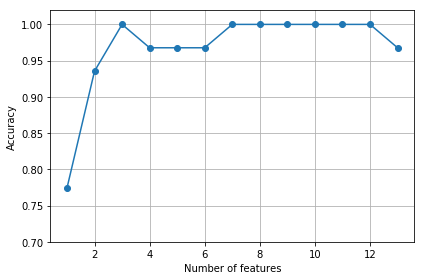

In [129]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# feature가 하나 남을때까지 알고리즘 실행
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 각 단계에서 남은 feature 개수
k_feat = [len(k) for k in sbs.subsets_]

# 남은 feature 개수에 따른 score 플롯
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()